In [1]:
# TensorFlow 라이브러리를 사용한 선형 회귀 학습 알고리즘의 예.

# 작성자: Aymeric Damien
# 수정자: 정 경태
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [3]:
# 파라메터(Parameters)
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# 훈련 데이터
train_X = numpy.asarray([1., 2., 3., 4., 5.])
train_Y = numpy.asarray([3., 5., 7., 9., 11.])
# train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
#                          7.042,10.791,5.313,7.997,5.654,9.27,3.1])
# train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
#                          2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape[0]

In [5]:
# tf 그래프(Graph) 입력
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 모델 가중치(weights) 설정
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# 선형 모델 생성
pred = tf.add(tf.mul(X, W), b)

In [7]:
# 평균 제곱 오차
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# 변수 초기화
init = tf.initialize_all_variables()

Epoch: 0050 cost= 0.020101925 W= 2.12668 b= 0.529913
Epoch: 0100 cost= 0.016914533 W= 2.11772 b= 0.568654
Epoch: 0150 cost= 0.014266794 W= 2.10812 b= 0.603851
Epoch: 0200 cost= 0.012033547 W= 2.0993 b= 0.636175
Epoch: 0250 cost= 0.010149950 W= 2.0912 b= 0.665861
Epoch: 0300 cost= 0.008561155 W= 2.08376 b= 0.693124
Epoch: 0350 cost= 0.007221073 W= 2.07692 b= 0.718164
Epoch: 0400 cost= 0.006090780 W= 2.07065 b= 0.74116
Epoch: 0450 cost= 0.005137363 W= 2.06488 b= 0.76228
Epoch: 0500 cost= 0.004333228 W= 2.05959 b= 0.781676
Epoch: 0550 cost= 0.003654943 W= 2.05473 b= 0.79949
Epoch: 0600 cost= 0.003082814 W= 2.05026 b= 0.815851
Epoch: 0650 cost= 0.002600290 W= 2.04616 b= 0.830876
Epoch: 0700 cost= 0.002193254 W= 2.04239 b= 0.844675
Epoch: 0750 cost= 0.001849939 W= 2.03893 b= 0.857349
Epoch: 0800 cost= 0.001560392 W= 2.03576 b= 0.868988
Epoch: 0850 cost= 0.001316150 W= 2.03284 b= 0.879677
Epoch: 0900 cost= 0.001110129 W= 2.03016 b= 0.889495
Epoch: 0950 cost= 0.000936363 W= 2.0277 b= 0.898512

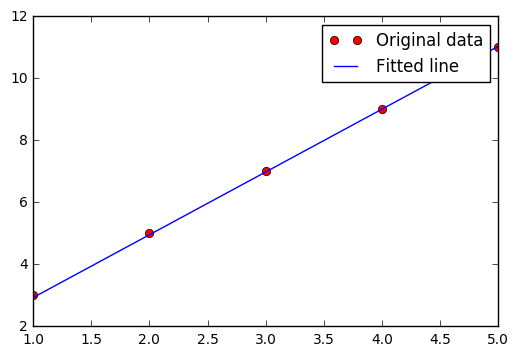

In [9]:
# 세션 설정
session_conf = tf.ConfigProto()
session_conf.gpu_options.allow_growth = True

# 그래프 실행
with tf.Session(config=session_conf) as sess:
    sess.run(init)

    # 모든 훈련 데이터에 피팅(fit)
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # 매 epoch 스텝 마다 화면에 로그 출력
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("최적화 종료됨!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # 그래프 출력
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [10]:
# Regression result